In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

path = '/content/drive/MyDrive/CSV/Shopping_CustomerData.csv'

df = pd.read_csv(path)
df.describe()

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


In [6]:
df_new = df[["CustomerAge","SpendingScore"]]
df_new.head

<bound method NDFrame.head of      CustomerAge  SpendingScore
0             49             78
1             59             63
2             54             69
3             42             30
4             30              6
..           ...            ...
195           54             52
196           20             58
197           44             36
198           28             24
199           41             31

[200 rows x 2 columns]>

In [7]:
df_new.describe()

,CustomerAge,SpendingScore
count,200.000000,200.00000
mean,45.520000,50.70500
std,16.113592,28.72269
min,18.000000,2.00000
25%,31.750000,27.75000
50%,46.500000,48.00000
75%,59.000000,77.00000
max,75.000000,100.00000


In [9]:
df_new.isnull().sum()

CustomerAge      0
SpendingScore    0
dtype: int64

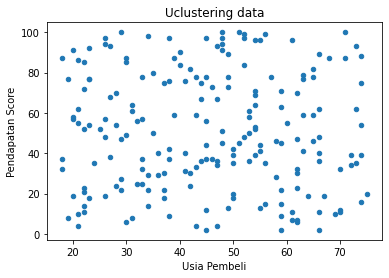

In [10]:

df.plot(kind='scatter',x='CustomerAge', y='SpendingScore')

plt.xlabel('Usia Pembeli')
plt.ylabel('Pendapatan Score')
plt.title('Uclustering data')
plt.show()

In [11]:
k = 3
np.random.seed(40)

random_centroids=[]
for i in range(1,k+1):
   random_centroids.append([np.random.randint(1,100), np.random.randint(1,100)])
print('Randomly selested points as random_centroids:',random_centroids)

Randomly selested points as random_centroids: [[71, 92], [8, 38], [57, 51]]


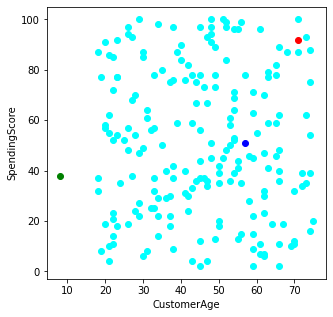

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color="cyan")
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.show()

In [13]:
#Langkah kedua

#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
def assignment(df_new,random_centroids):

  for i in range(length) :
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroid'] = list1
  df_new['Color']=list2
  return df_new

In [14]:
df_new  =  assignment(df_new, random_centroids)
df_new.head()

,CustomerAge,SpendingScore,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color
0,49,78,26.076810,57.280014,28.160256,0,r
1,59,63,31.384710,56.797887,12.165525,2,b
2,54,69,28.600699,55.470713,18.248288,2,b
3,42,30,68.447060,34.928498,25.806976,2,b
4,30,6,95.273291,38.832976,52.478567,1,g


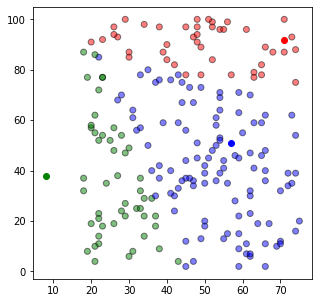

In [15]:
#Penempatan Cluster
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color =df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])

In [16]:
def update(parameter):
  for i in range(length):
    random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['CustomerAge'])
    random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i]['SpendingScore'])
  return parameter

In [17]:
random_centroids = update(random_centroids)
random_centroids

[[49.16279069767442, 90.09302325581395],
 [26.387755102040817, 35.97959183673469],
 [52.75, 41.7037037037037]]

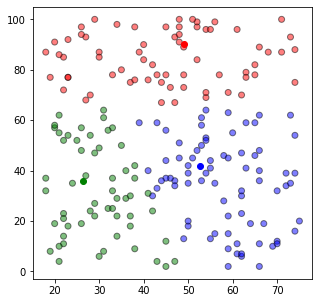

In [18]:
df_new = assignment(df_new, random_centroids)
df_new.head()
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
for i in range(length):
  plt.scatter(*random_centroids[i], color=colors1[i])
plt.show()

In [19]:
count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid' ,old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)

  new_random_centroids = np.round(random_centroids)
  print('New Centroid' ,new_random_centroids)

  df_new = assignment(df_new, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)
  print(result)
  if result == True:
    break

print(count)

Old Centroid [[49. 90.]
 [26. 36.]
 [53. 42.]]
New Centroid [[45. 85.]
 [30. 32.]
 [58. 35.]]
False
Old Centroid [[45. 85.]
 [30. 32.]
 [58. 35.]]
New Centroid [[45. 82.]
 [30. 31.]
 [59. 33.]]
False
Old Centroid [[45. 82.]
 [30. 31.]
 [59. 33.]]
New Centroid [[45. 82.]
 [31. 30.]
 [60. 32.]]
False
Old Centroid [[45. 82.]
 [31. 30.]
 [60. 32.]]
New Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
False
Old Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
New Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
True
6


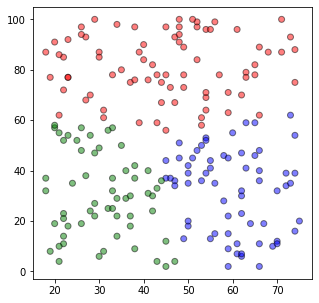

In [20]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
plt.show()

In [21]:
df = df[["CustomerAge","SpendingScore"]]
df.head()

,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [23]:
labels = kmeans.predict(df)
labels

array([1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2,
       1, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 2], dtype=int32)

In [24]:
centroids = kmeans.cluster_centers_
centroids

array([[47.06756757, 47.05405405],
       [44.82089552, 84.65671642],
       [44.37288136, 16.72881356]])

In [25]:
kmeans.inertia_

69228.85879694519

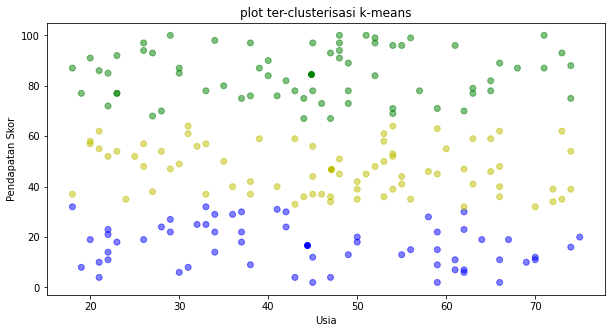

In [26]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)
plt.scatter(df['CustomerAge'], df['SpendingScore'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('Usia')
plt.ylabel('Pendapatan Skor')
plt.title('plot ter-clusterisasi k-means')
plt.show()


In [27]:
inertia_list = []
for num_clusters in np.arange(1, 21):
  kmeans =KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)

In [28]:
inertia_list

[215843.515,
 93076.9609500805,
 69228.85879694519,
 52539.82162646518,
 38741.97371675943,
 30306.492221416454,
 25131.82143271798,
 21663.654961919176,
 19221.242838497223,
 16872.916942084976,
 14890.486279107601,
 13234.64485400221,
 12365.163150901384,
 11423.45297250909,
 10527.503920907095,
 10067.625739933439,
 9294.80662959761,
 8724.608968808967,
 8164.305776971569,
 7660.685627934159]

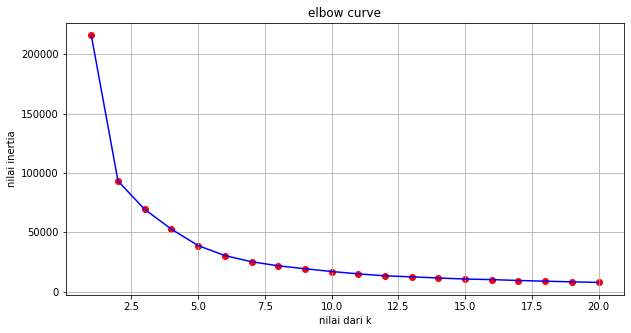

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('nilai dari k')
plt.ylabel('nilai inertia')
plt.title('elbow curve')
plt.show()